In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [75]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.formula.api as smfa
from pmdarima import auto_arima
from patsy import dmatrices
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder

In [3]:
cats = pd.read_csv('data_ba/cats.csv')
cats.head()

Sex  Bwt  Hwt
0   F  2.0  7.0
1   F  2.0  7.4
2   F  2.0  9.5
3   F  2.1  7.2
4   F  2.1  7.3

In [4]:
pd.concat([cats.dtypes, cats.nunique()], axis=1), cats.shape

(           0   1
 Sex   object   2
 Bwt  float64  20
 Hwt  float64  73,
 (144, 3))

In [5]:
# 귀무가설: 정규성을 가진다 / 대립가설: 정규성을 가지지 않는다
ss.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [6]:
mu = 2.6
ss.wilcoxon(cats['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [7]:
ss.ttest_1samp(cats['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

<AxesSubplot:ylabel='Frequency'>

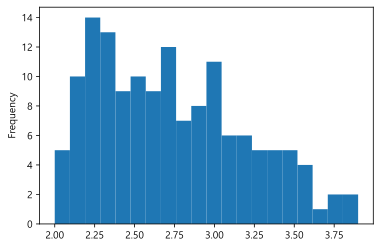

In [8]:
cats['Bwt'].plot.hist(bins=20)

In [9]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data = pd.DataFrame(data)
data.head()

before  after
0       7      8
1       3      4
2       4      5
3       5      6
4       2      2

In [10]:
ss.ttest_rel(data['after'], data['before'], alternative='two-sided')

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0010538712570165528)

In [11]:
cats.head()

Sex  Bwt  Hwt
0   F  2.0  7.0
1   F  2.0  7.4
2   F  2.0  9.5
3   F  2.1  7.2
4   F  2.1  7.3

In [12]:
female = cats.loc[cats['Sex'] == 'F', 'Bwt']
male = cats.loc[cats['Sex'] == 'M', 'Bwt']
female.shape, male.shape

((47,), (97,))

In [13]:
# 귀무가설: 등분산성을 만족한다 / 대립가설: 등분산성을 만족하지 않는다
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [14]:
ss.ttest_ind(female, male, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [15]:
iris = pd.read_csv('data_ba/iris.csv')
iris.head()

sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [16]:
target_list = iris['target'].unique()
setosa = iris.loc[iris['target'] == target_list[0], 'sepal width']
versicolor = iris.loc[iris['target'] == target_list[1], 'sepal width']
virginica = iris.loc[iris['target'] == target_list[2], 'sepal width']

c:\Users\admin\anaconda3\lib\site-packages\seaborn\relational.py:608: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  scout = ax.scatter(scout_x, scout_y, **kws)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\relational.py:337: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  artist = func([], [], label=label, **use_kws)
c:\Users\admin\anaconda3\lib\site-packages\seaborn\relational.py:337: Ma

<AxesSubplot:xlabel='target', ylabel='sepal width'>

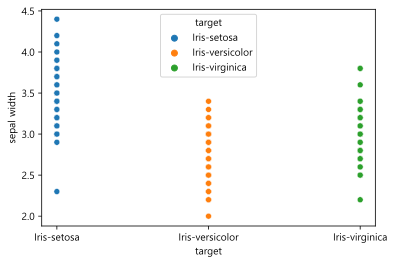

In [17]:
sns.scatterplot(data=iris, x='target', y='sepal width', hue='target')

In [18]:
# 정규성 검정 → 정규성 만족
ss.shapiro(setosa), ss.shapiro(versicolor), ss.shapiro(virginica)

(ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427),
 ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507),
 ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896))

In [19]:
# 등분산성 검정 → 등분산성 만족
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [20]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

<class 'statsmodels.iolib.table.SimpleTable'>

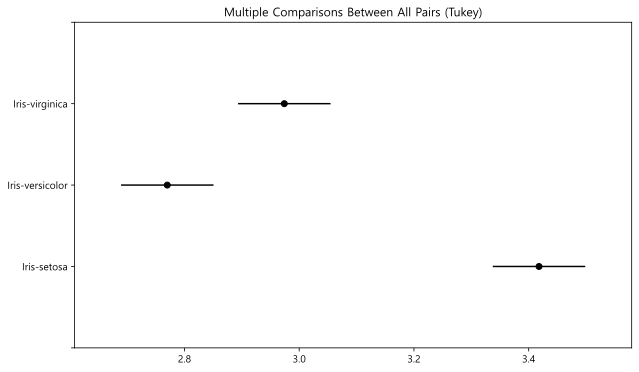

In [21]:
mc = MultiComparison(data=iris['sepal width'], groups=iris['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()
# diff는 오른쪽 집단 - 왼쪽 집단
tukeyhsd.summary()

In [22]:
# 정규성을 만족하지 못했을 경우
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [23]:
# 등분산성을 만족하지 못했을 경우
pg.welch_anova(data=iris, dv='sepal width', between='target')

Source  ddof1      ddof2          F         p-unc       np2
0  target      2  97.369597  43.303381  3.519723e-14  0.391881

In [24]:
mtcars = pd.read_csv('data_ba/mtcars.csv')
mtcars.head()

Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [25]:
# 각 범주형 변수 및 교호작용이 종속변수에 영향을 미치는지 → 교호작용이 존재하지 않아야(귀무가설이 맞아야)
formula = 'mpg ~ C(cyl) + C(am) + C(cyl):C(am)'
model = smfa.ols(formula, mtcars).fit()
aov_table = anova_lm(model, typ=2)
aov_table

sum_sq    df          F        PR(>F)
C(cyl)        456.400921   2.0  24.819011  9.354735e-07
C(am)          36.766919   1.0   3.998759  5.608373e-02
C(cyl):C(am)   25.436511   2.0   1.383233  2.686140e-01
Residual      239.059167  26.0        NaN           NaN

<class 'statsmodels.iolib.table.SimpleTable'>

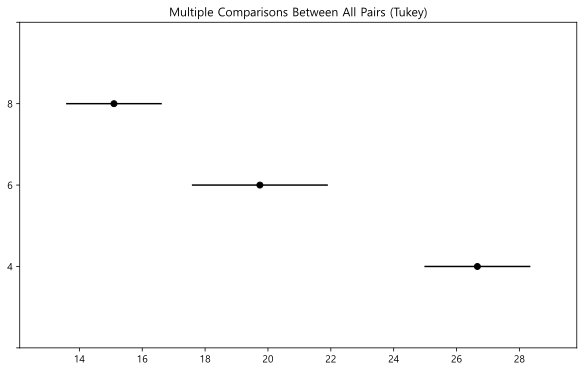

In [26]:
mc = MultiComparison(data=mtcars['mpg'], groups=mtcars['cyl'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
fig = tukeyhsd.plot_simultaneous()
tukeyhsd.summary()

In [27]:
tit_df = pd.read_csv('data_ba/titanic.csv')
tit_df.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

   adult_male  embark_town  
0        True  Southampton  
1       False    Cherbourg  
2       False  Southampton  
3       False  Southampton  
4        True  Southampton

In [28]:
pd.concat([tit_df.dtypes, tit_df.nunique()], axis=1)

0    1
survived       int64    2
pclass         int64    3
sex           object    2
age          float64   88
sibsp          int64    7
parch          int64    7
fare         float64  248
embarked      object    3
class         object    3
adult_male      bool    2
embark_town   object    3

In [29]:
sex = ['female', 'male']
exp = (tit_df.loc[:, 'sex'].value_counts(normalize=True, sort=False).reindex(sex) * tit_df.loc[tit_df['survived'] == 1, :].shape[0]).round(0)

In [30]:
obs = tit_df.loc[tit_df['survived'] == 1, 'sex'].value_counts(sort=False).reindex(sex)

In [31]:
# 적합도(goodness of fit) 검정 → 카이제곱 값이 너무 높아서 p-value가 안나오는듯
ss.chisquare(obs, exp, ddof=tit_df.shape[0] - 1)

Power_divergenceResult(statistic=160.4296024830784, pvalue=nan)

In [32]:
table = pd.crosstab(tit_df['class'], tit_df['survived'])
table

survived    0    1
class             
First      80  136
Second     97   87
Third     372  119

In [33]:
# 독립성(동질성) 검정
chi2, p_value, ddof, exp = ss.chi2_contingency(table)
chi2, p_value, ddof, exp

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909,  82.90909091],
        [113.37373737,  70.62626263],
        [302.53535354, 188.46464646]]))

In [34]:
house_df = pd.read_csv('data_ba/kc_house_data.csv')
house_df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  condition  grade  sqft_above  \
0      5650     1.0   standard     0          3      7        1180   
1      7242     2.0   standard     0          3      7        2170   
2     10000     1.0   standard     0          3      6         770   
3      5000     1.0   standard     0          5      7        1050   
4      8080     1.0   standard     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  sqft_living15  sqft_lot15  
0              0      1955             0           1340        5650  
1            400      1951          1991           1690        7639  
2              0      1933             0           2720        8062  
3            910      1965             0           1360        5000  
4              0      1987             0           1800        7503

In [35]:
house = house_df.loc[:, ['price', 'sqft_living']]
house.corr()

price  sqft_living
price        1.000000     0.702035
sqft_living  0.702035     1.000000

In [36]:
X = house.loc[:, ['sqft_living']]
y = house.loc[:, 'price']

In [37]:
formula = 'price ~ sqft_living'
model = smfa.ols(formula, house).fit()
# F통계량을 통해 회귀분석의 유의성 확인 → 귀무가설: 회귀 모형은 유의하지 않다
# t통계량을 통해 회귀계수의 유의성 확인 → 귀무가설: 회귀계수는 유의하지 않다
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):               0.00
Time:                        17:39:15   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# 잔차의 등분산성을 확인 → 그냥 x축과 y축이 등분산인지 확인하면 알 수 있을듯
ss.levene(house['sqft_living'], house['price'])

LeveneResult(statistic=11279.767410741559, pvalue=0.0)

In [39]:
# seaborn을 활용한 residplot으로 시각적 확인
sns.residplot(data=house, x='sqft_living', y='price')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

In [40]:
cars = pd.read_csv('data_ba/Cars93.csv')
cars.head()

Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8        25   
1        Acura   Legend  Midsize       29.2   33.9       38.7        18   
2         Audi       90  Compact       25.9   29.1       32.3        20   
3         Audi      100  Midsize       30.8   37.7       44.6        19   
4          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0           31                None      Front  ...          5     177   
1           25  Driver & Passenger      Front  ...          5     195   
2           26         Driver only      Front  ...          5     180   
3           26  Driver & Passenger      Front  ...          6     193   
4           30         Driver only       Rear  ...          4     186   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
0        102     68           37           26.5            11    2705   
1        115     71           38           30.0            15    3560   
2        102     67           37           28.0            14    3375   
3        106     70           37           31.0            17    3405   
4        109     69           39           27.0            13    3640   

    Origin           Make  
0  non-USA  Acura Integra  
1  non-USA   Acura Legend  
2  non-USA        Audi 90  
3  non-USA       Audi 100  
4  non-USA       BMW 535i  

[5 rows x 27 columns]

In [41]:
cars.columns = [column.replace('.', '_') for column in cars.columns]
cars.head()

Manufacturer    Model     Type  Min_Price  Price  Max_Price  MPG_city  \
0        Acura  Integra    Small       12.9   15.9       18.8        25   
1        Acura   Legend  Midsize       29.2   33.9       38.7        18   
2         Audi       90  Compact       25.9   29.1       32.3        20   
3         Audi      100  Midsize       30.8   37.7       44.6        19   
4          BMW     535i  Midsize       23.7   30.0       36.2        22   

   MPG_highway             AirBags DriveTrain  ... Passengers  Length  \
0           31                None      Front  ...          5     177   
1           25  Driver & Passenger      Front  ...          5     195   
2           26         Driver only      Front  ...          5     180   
3           26  Driver & Passenger      Front  ...          6     193   
4           30         Driver only       Rear  ...          4     186   

   Wheelbase  Width  Turn_circle Rear_seat_room  Luggage_room  Weight  \
0        102     68           37           26.5            11    2705   
1        115     71           38           30.0            15    3560   
2        102     67           37           28.0            14    3375   
3        106     70           37           31.0            17    3405   
4        109     69           39           27.0            13    3640   

    Origin           Make  
0  non-USA  Acura Integra  
1  non-USA   Acura Legend  
2  non-USA        Audi 90  
3  non-USA       Audi 100  
4  non-USA       BMW 535i  

[5 rows x 27 columns]

In [42]:
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPG_city + MPG_highway'
model = smfa.ols(formula, cars).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           4.88e-14
Time:                        17:39:16   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize      4.4732      1.410      3.172      0.002       1.670       7.276
RPM             0.0071      0.001      5.138      0.000       0.004       0.010
Weight          0.0056      0.003      1.634      0.106      -0.001       0.012
Length         -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPG_city       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPG_highway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X = cars.loc[:, ['EngineSize', 'RPM', 'Weight', 'Length', 'MPG_city', 'MPG_highway']]
y = cars.loc[:, 'Price']

In [44]:
# 다중공선성 확인을 위한 상관관계
X.corr()

EngineSize       RPM    Weight    Length  MPG_city  MPG_highway
EngineSize     1.000000 -0.547898  0.845075  0.780283 -0.710003    -0.626795
RPM           -0.547898  1.000000 -0.427931 -0.441249  0.363045     0.313469
Weight         0.845075 -0.427931  1.000000  0.806274 -0.843139    -0.810658
Length         0.780283 -0.441249  0.806274  1.000000 -0.666239    -0.542897
MPG_city      -0.710003  0.363045 -0.843139 -0.666239  1.000000     0.943936
MPG_highway   -0.626795  0.313469 -0.810658 -0.542897  0.943936     1.000000

In [45]:
y, X = dmatrices(formula, data=cars, return_type='dataframe')

In [46]:
# 다중공선성 확인을 위한 VIF → MPG_city 변수 제거 가능
vif_list = []
for i in range(1, len(X.columns)):
    vif_list.append([variance_inflation_factor(X.values, i), X.columns[i]])
pd.DataFrame(vif_list, columns=['vif', 'variable'])

vif     variable
0   4.605118   EngineSize
1   1.446859          RPM
2   8.685973       Weight
3   4.013002       Length
4  13.668288     MPG_city
5  12.943133  MPG_highway

In [47]:
formula = 'Price ~ EngineSize + RPM + Weight + Length + MPG_highway'
model = smfa.ols(formula, cars).fit()
# MPG_highway 계수에 대한 t검정의 p-value가 현저히 낮아진 모습 확인
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.28e-14
Time:                        17:39:16   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize      4.6591      1.386      3.361      0.001       1.904       7.415
RPM             0.0071      0.001      5.173      0.000       0.004       0.010
Weight          0.0053      0.003      1.567      0.121      -0.001       0.012
Length         -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPG_highway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']
test_df = pd.DataFrame(data, columns=['product'])
test_df['product'] = test_df['product'].replace({'a':1, 'b':0})
test_df.head()

product
0        1
1        1
2        0
3        0
4        1

In [49]:
# 런검정 → 귀무가설: 연속적인 관측값이 임의적이다
# 런검정은 정규분포 사용 → Z통계량
# correction 파라미터는 표본이 50개 이하일 때 'mean' 등을 0.5로 규정
z, p_value = runstest_1samp(test_df, cutoff='mean', correction=True)
z, p_value

(-1.1144881152070183, 0.26506984027306035)

In [50]:
dataset = [['Apple', 'Beer', 'Rice', 'Chicken'],
           ['Apple', 'Beer', 'Rice'],
           ['Apple', 'Beer'],
           ['Apple', 'Bananas'],
           ['Milk', 'Beer', 'Rice', 'Chicken'],
           ['Milk', 'Beer', 'Rice'],
           ['Milk', 'Beer'],
           ['Apple', 'Bananas']]

In [51]:
# 연관규칙 분석을 위해서는 트랜잭션 데이터로 변경 필요
te = TransactionEncoder().fit(dataset)
te_array = te.transform(dataset)
# columns_ 속성 → sklearn의 get_feature_names_out() 메서드와 유사
te.columns_, te_array

(['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice'],
 array([[ True, False,  True,  True, False,  True],
        [ True, False,  True, False, False,  True],
        [ True, False,  True, False, False, False],
        [ True,  True, False, False, False, False],
        [False, False,  True,  True,  True,  True],
        [False, False,  True, False,  True,  True],
        [False, False,  True, False,  True, False],
        [ True,  True, False, False, False, False]]))

In [52]:
data_df = pd.DataFrame(te_array, columns=te.columns_)
data_df

Apple  Bananas   Beer  Chicken   Milk   Rice
0   True    False   True     True  False   True
1   True    False   True    False  False   True
2   True    False   True    False  False  False
3   True     True  False    False  False  False
4  False    False   True     True   True   True
5  False    False   True    False   True   True
6  False    False   True    False   True  False
7   True     True  False    False  False  False

In [53]:
# apriori 함수 활용 → lambda식 이용하여 아이템 수(길이) 추가
freq_items = (apriori(data_df, min_support=0.3, use_colnames=True)
.assign(length=lambda df: df['itemsets'].apply(lambda x: len(x)))
)
freq_items

support       itemsets  length
0    0.625        (Apple)       1
1    0.750         (Beer)       1
2    0.375         (Milk)       1
3    0.500         (Rice)       1
4    0.375  (Apple, Beer)       2
5    0.375   (Milk, Beer)       2
6    0.500   (Rice, Beer)       2

In [54]:
gro_df = pd.read_csv('data_ba/groceries.csv', names=['food'])
gro_df.head()

food
0  citrus fruit,semi-finished bread,margarine,rea...
1                       tropical fruit,yogurt,coffee
2                                         whole milk
3         pip fruit,yogurt,cream cheese,meat spreads
4  other vegetables,whole milk,condensed milk,lon...

In [55]:
gro_df_split = gro_df['food'].str.split(',', expand=True)
gro_df_split.head()

0                    1               2   \
0      citrus fruit  semi-finished bread       margarine   
1    tropical fruit               yogurt          coffee   
2        whole milk                 None            None   
3         pip fruit               yogurt    cream cheese   
4  other vegetables           whole milk  condensed milk   

                         3     4     5     6     7     8     9   ...    22  \
0               ready soups  None  None  None  None  None  None  ...  None   
1                      None  None  None  None  None  None  None  ...  None   
2                      None  None  None  None  None  None  None  ...  None   
3              meat spreads  None  None  None  None  None  None  ...  None   
4  long life bakery product  None  None  None  None  None  None  ...  None   

     23    24    25    26    27    28    29    30    31  
0  None  None  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  None  None  

[5 rows x 32 columns]

In [56]:
groceries = []
for i in range(len(gro_df_split)):
    # filter(a, b) 함수를 이용하여 b의 리스트에서 a를 제거
    groceries.append(list(filter(None, gro_df_split.values[i])))
groceries

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [57]:
te = TransactionEncoder().fit(groceries)
te_array = te.transform(groceries)
te.columns_, te_array

(['Instant food products',
  'UHT-milk',
  'abrasive cleaner',
  'artif. sweetener',
  'baby cosmetics',
  'baby food',
  'bags',
  'baking powder',
  'bathroom cleaner',
  'beef',
  'berries',
  'beverages',
  'bottled beer',
  'bottled water',
  'brandy',
  'brown bread',
  'butter',
  'butter milk',
  'cake bar',
  'candles',
  'candy',
  'canned beer',
  'canned fish',
  'canned fruit',
  'canned vegetables',
  'cat food',
  'cereals',
  'chewing gum',
  'chicken',
  'chocolate',
  'chocolate marshmallow',
  'citrus fruit',
  'cleaner',
  'cling film/bags',
  'cocoa drinks',
  'coffee',
  'condensed milk',
  'cooking chocolate',
  'cookware',
  'cream',
  'cream cheese',
  'curd',
  'curd cheese',
  'decalcifier',
  'dental care',
  'dessert',
  'detergent',
  'dish cleaner',
  'dishes',
  'dog food',
  'domestic eggs',
  'female sanitary products',
  'finished products',
  'fish',
  'flour',
  'flower (seeds)',
  'flower soil/fertilizer',
  'frankfurter',
  'frozen chicken',
  'fr

In [58]:
gro_df_te = pd.DataFrame(te_array, columns=te.columns_)
gro_df_te.head()

Instant food products  UHT-milk  abrasive cleaner  artif. sweetener  \
0                  False     False             False             False   
1                  False     False             False             False   
2                  False     False             False             False   
3                  False     False             False             False   
4                  False     False             False             False   

   baby cosmetics  baby food   bags  baking powder  bathroom cleaner   beef  \
0           False      False  False          False             False  False   
1           False      False  False          False             False  False   
2           False      False  False          False             False  False   
3           False      False  False          False             False  False   
4           False      False  False          False             False  False   

   ...  turkey  vinegar  waffles  whipped/sour cream  whisky  white bread  \
0  ...   False    False    False               False   False        False   
1  ...   False    False    False               False   False        False   
2  ...   False    False    False               False   False        False   
3  ...   False    False    False               False   False        False   
4  ...   False    False    False               False   False        False   

   white wine  whole milk  yogurt  zwieback  
0       False       False   False     False  
1       False       False    True     False  
2       False        True   False     False  
3       False       False    True     False  
4       False        True   False     False  

[5 rows x 169 columns]

In [59]:
gro_ap = apriori(gro_df_te, min_support=0.01, use_colnames=True)
gro_ap.head()

support         itemsets
0  0.033452       (UHT-milk)
1  0.017692  (baking powder)
2  0.052466           (beef)
3  0.033249        (berries)
4  0.026029      (beverages)

In [60]:
# metric 파라미터는 'support', 'confidence', 'lift' 중 택일
asso_df = (association_rules(gro_ap, metric='lift', min_threshold=3)
.assign(ant_len=lambda df: df['antecedents'].apply(lambda x: len(x)))
.sort_values(by='lift', ascending=False)
)
asso_df

antecedents                         consequents  \
6                 (whole milk, yogurt)                              (curd)   
7                               (curd)                (whole milk, yogurt)   
2     (other vegetables, citrus fruit)                   (root vegetables)   
5                    (root vegetables)    (other vegetables, citrus fruit)   
12          (other vegetables, yogurt)                (whipped/sour cream)   
13                (whipped/sour cream)          (other vegetables, yogurt)   
8   (other vegetables, tropical fruit)                   (root vegetables)   
11                   (root vegetables)  (other vegetables, tropical fruit)   
0                    (root vegetables)                              (beef)   
1                               (beef)                   (root vegetables)   
3      (citrus fruit, root vegetables)                  (other vegetables)   
4                   (other vegetables)     (citrus fruit, root vegetables)   
9    (tropical fruit, root vegetables)                  (other vegetables)   
10                  (other vegetables)   (tropical fruit, root vegetables)   

    antecedent support  consequent support   support  confidence      lift  \
6             0.056024            0.053279  0.010066    0.179673  3.372304   
7             0.053279            0.056024  0.010066    0.188931  3.372304   
2             0.028876            0.108998  0.010371    0.359155  3.295045   
5             0.108998            0.028876  0.010371    0.095149  3.295045   
12            0.043416            0.071683  0.010168    0.234192  3.267062   
13            0.071683            0.043416  0.010168    0.141844  3.267062   
8             0.035892            0.108998  0.012303    0.342776  3.144780   
11            0.108998            0.035892  0.012303    0.112873  3.144780   
0             0.108998            0.052466  0.017387    0.159515  3.040367   
1             0.052466            0.108998  0.017387    0.331395  3.040367   
3             0.017692            0.193493  0.010371    0.586207  3.029608   
4             0.193493            0.017692  0.010371    0.053600  3.029608   
9             0.021047            0.193493  0.012303    0.584541  3.020999   
10            0.193493            0.021047  0.012303    0.063584  3.020999   

    leverage  conviction  ant_len  
6   0.007081    1.154078        2  
7   0.007081    1.163866        1  
2   0.007224    1.390354        2  
5   0.007224    1.073242        1  
12  0.007056    1.212206        2  
13  0.007056    1.114697        1  
8   0.008391    1.355705        2  
11  0.008391    1.086776        1  
0   0.011668    1.127366        1  
1   0.011668    1.332628        1  
3   0.006948    1.949059        2  
4   0.006948    1.037941        1  
9   0.008231    1.941244        2  
10  0.008231    1.045425        1

In [61]:
asso_df = (association_rules(gro_ap, metric='confidence', min_threshold=0.5)
.assign(ant_len=lambda df: df['antecedents'].apply(lambda x: len(x)))
.sort_values(by='confidence', ascending=False)
)
asso_df

antecedents         consequents  \
1          (citrus fruit, root vegetables)  (other vegetables)   
6        (tropical fruit, root vegetables)  (other vegetables)   
2                           (curd, yogurt)        (whole milk)   
0               (other vegetables, butter)        (whole milk)   
11       (tropical fruit, root vegetables)        (whole milk)   
12               (root vegetables, yogurt)        (whole milk)   
3        (other vegetables, domestic eggs)        (whole milk)   
14            (yogurt, whipped/sour cream)        (whole milk)   
10           (rolls/buns, root vegetables)        (whole milk)   
4            (other vegetables, pip fruit)        (whole milk)   
13                (tropical fruit, yogurt)        (whole milk)   
9               (other vegetables, yogurt)        (whole milk)   
8   (other vegetables, whipped/sour cream)        (whole milk)   
5            (rolls/buns, root vegetables)  (other vegetables)   
7                (root vegetables, yogurt)  (other vegetables)   

    antecedent support  consequent support   support  confidence      lift  \
1             0.017692            0.193493  0.010371    0.586207  3.029608   
6             0.021047            0.193493  0.012303    0.584541  3.020999   
2             0.017285            0.255516  0.010066    0.582353  2.279125   
0             0.020031            0.255516  0.011490    0.573604  2.244885   
11            0.021047            0.255516  0.011998    0.570048  2.230969   
12            0.025826            0.255516  0.014540    0.562992  2.203354   
3             0.022267            0.255516  0.012303    0.552511  2.162336   
14            0.020742            0.255516  0.010880    0.524510  2.052747   
10            0.024301            0.255516  0.012710    0.523013  2.046888   
4             0.026131            0.255516  0.013523    0.517510  2.025351   
13            0.029283            0.255516  0.015150    0.517361  2.024770   
9             0.043416            0.255516  0.022267    0.512881  2.007235   
8             0.028876            0.255516  0.014642    0.507042  1.984385   
5             0.024301            0.193493  0.012201    0.502092  2.594890   
7             0.025826            0.193493  0.012913    0.500000  2.584078   

    leverage  conviction  ant_len  
1   0.006948    1.949059        2  
6   0.008231    1.941244        2  
2   0.005649    1.782567        2  
0   0.006371    1.745992        2  
11  0.006620    1.731553        2  
12  0.007941    1.703594        2  
3   0.006613    1.663694        2  
14  0.005580    1.565719        2  
10  0.006500    1.560804        2  
4   0.006846    1.543003        2  
13  0.007668    1.542528        2  
9   0.011174    1.528340        2  
8   0.007263    1.510239        2  
5   0.007499    1.619792        2  
7   0.007916    1.613015        2

<AxesSubplot:xlabel='day'>

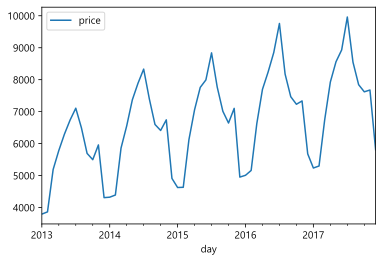

In [62]:
time_df = pd.read_csv('data_ba/arima_data.csv', names=['day', 'price'], parse_dates=['day'], index_col='day')
time_df.head()
time_df.plot()

<Figure size 1080x432 with 0 Axes>

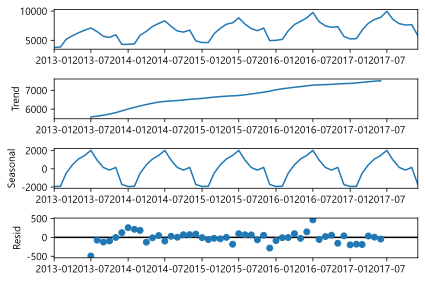

In [63]:
plt.figure(figsize=(15, 6))
result = seasonal_decompose(time_df, model='additive')
# result.plot() 형태로 기재해줘야 그래프가 등장
result.plot()
plt.show()

In [64]:
train = time_df[:'2016-12-01']
test = time_df['2017-01-01':]

In [65]:
# adfuller 검정 → 귀무가설: 정상성을 갖지 않는다
adf = adfuller(train, regression='ct')
adf

(-1.9997199341327108,
 0.6015863303794554,
 10,
 37,
 {'1%': -4.226862411110892,
  '5%': -3.536645678834422,
  '10%': -3.200239967030581},
 571.2814574908573)

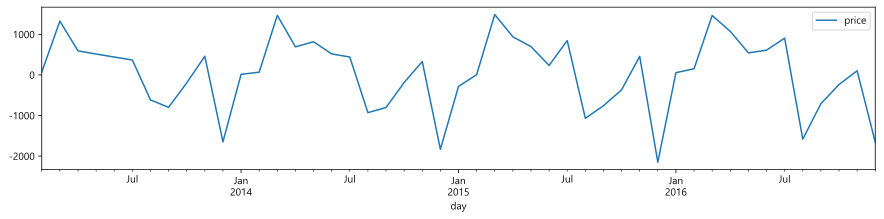

In [68]:
fig, ax = plt.subplots(figsize=(15, 3))
diff_data = train.diff(1).dropna()
diff_data.plot(ax=ax)
plt.show()

In [70]:
adf = adfuller(diff_data, regression='c')
adf

(-12.094547576926429,
 2.085160639961008e-22,
 10,
 36,
 {'1%': -3.626651907578875,
  '5%': -2.9459512825788754,
  '10%': -2.6116707716049383},
 522.2910197373668)

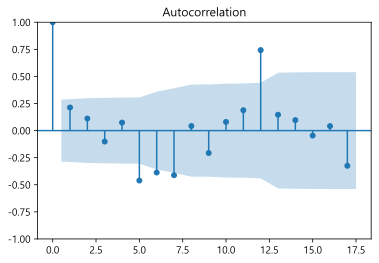

In [73]:
# AR에서의 p값을 찾기 위해 plot_acf를 활용하여 0으로 수렴할 때의 시차를 AR(p)값으로 설정
plot_acf(diff_data)
plt.show()

c:\Users\admin\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


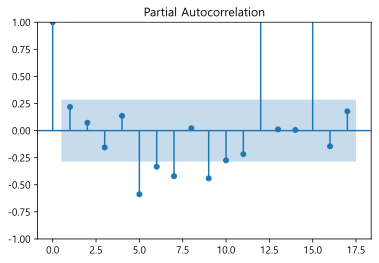

In [74]:
# MA에서의 q값을 찾기 위해 plot_pacf를 활용하여 0으로 수렴할 때의 시차를 MA(q)값으로 설정
plot_pacf(diff_data)
plt.show()

In [77]:
# trend 파라미터는 adfuller 검정의 regression과 동일한 형태
# d(차분)이 1일 경우 안되는데.. 왜지..?
model = ARIMA(train, order=(2, 0, 2), trend='ct').fit()
model.summary()

c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -380.820
Date:                Sun, 08 Jan 2023   AIC                            775.641
Time:                        18:30:15   BIC                            788.739
Sample:                    01-01-2013   HQIC                           780.591
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5282.7120    704.253      7.501      0.000    3902.401    6663.023
x1            45.1229     23.326      1.934      0.053      -0.596      90.842
ar.L1         -0.4787      0.167     -2.859      0.004      -0.807      -0.150
ar.L2          0.5170      0.170      3.041      0.002       0.184       0.850
ma.L1          1.9561      0.212      9.244      0.000       1.541       2.371
ma.L2          0.9851      0.214      4.607      0.000       0.566       1.404
sigma2       3.85e+05      0.132   2.91e+06      0.000    3.85e+05    3.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.75   Prob(JB):                         0.48
Heteroskedasticity (H):               1.37   Skew:                            -0.43
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.01e+23. Standard errors may be unstable.
"""

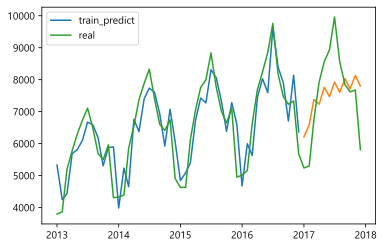

In [85]:
plt.plot(model.predict(), label='train_predict')
# arima_model에서는 forecast() 메서드로 예측
plt.plot(model.forecast(steps=len(test), alpha=0.05))
plt.plot(time_df, label='real')
plt.legend()
plt.show()

In [90]:
auto_model = auto_arima(train, start_p=0, d=1, start_q=0,
max_p=3, max_q=3, start_P=0, start_Q=0, max_P=3, max_Q=3, m=12, seasonal=True, information_criterion='aic')
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sun, 08 Jan 2023   AIC                            480.687
Time:                                     18:55:22   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

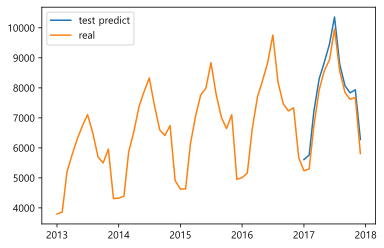

In [92]:
# auto_model에서는 forecast() 메서드로 예측
plt.plot(auto_model.predict(n_periods=len(test), alpha=0.05), label='test predict')
plt.plot(time_df, label='real')
plt.legend()
plt.show()